In [161]:
# Assignment 3
# Author : Angshuman Roy

In [162]:
import random
import matplotlib.pyplot as plt
import networkx as nx

In [163]:
def int_to_bin_list(num, length): # Converts the ECA rule number to a list of 8 bits
    return list(map(int, format(num, f'0{length}b')))

def apply_rule(rule, triplet):
    rule_bin = int_to_bin_list(rule, 8) # 8 because it is enough to accomodate all from 0 to 255
    index = 7 - int(''.join(map(str, triplet)), 2)
    return rule_bin[index]

def get_next_configuration(config, rule):
    n = len(config)
    next_config = []
    for i in range(n):
        left = config[i - 1] # Left neighbor(with periodic boundary)
        center = config[i]
        right = config[(i + 1) % n] # Right neighbor(with periodic boundary)
        next_config.append(apply_rule(rule, [left, center, right]))
    return next_config


def randomconfig(n):
    return [random.randint(0, 1) for _ in range(n)]


def eca(rule, n, steps, random_config_bool = False, config = None):
    
    if random_config_bool:
        current_config = randomconfig(n)
    else:
        current_config = config
        
    space_time = [current_config]
    
    for step in range(steps):
        current_config = get_next_configuration(current_config, rule)
        space_time.append(current_config)
    
    return space_time


In [164]:

rule = int(input("Enter ECA rule (0-255): "))
n = int(input("Enter lattice size (n): "))
steps = int(input("Enter number of steps: "))
    
space_time = eca(rule, n, steps, True)
    

In [165]:
# function to convert 8 bit binary to decimal
def bin_to_int(bin_list):
    return int(''.join(map(str, bin_list)), 2)

In [166]:
count = 0
for elem in space_time:
    print(f'Time step {count}: {elem}')
    count += 1  

Time step 0: [0, 0, 1, 1, 1, 0, 0, 0, 1, 1]
Time step 1: [1, 1, 1, 0, 1, 1, 0, 1, 1, 1]
Time step 2: [0, 0, 1, 0, 1, 1, 0, 1, 0, 0]
Time step 3: [0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
Time step 4: [1, 0, 1, 1, 1, 1, 1, 1, 0, 1]
Time step 5: [1, 0, 1, 0, 0, 0, 0, 1, 0, 1]
Time step 6: [1, 0, 0, 1, 0, 0, 1, 0, 0, 1]
Time step 7: [1, 1, 1, 0, 1, 1, 0, 1, 1, 1]
Time step 8: [0, 0, 1, 0, 1, 1, 0, 1, 0, 0]
Time step 9: [0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
Time step 10: [1, 0, 1, 1, 1, 1, 1, 1, 0, 1]
Time step 11: [1, 0, 1, 0, 0, 0, 0, 1, 0, 1]
Time step 12: [1, 0, 0, 1, 0, 0, 1, 0, 0, 1]
Time step 13: [1, 1, 1, 0, 1, 1, 0, 1, 1, 1]
Time step 14: [0, 0, 1, 0, 1, 1, 0, 1, 0, 0]
Time step 15: [0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
Time step 16: [1, 0, 1, 1, 1, 1, 1, 1, 0, 1]
Time step 17: [1, 0, 1, 0, 0, 0, 0, 1, 0, 1]
Time step 18: [1, 0, 0, 1, 0, 0, 1, 0, 0, 1]
Time step 19: [1, 1, 1, 0, 1, 1, 0, 1, 1, 1]
Time step 20: [0, 0, 1, 0, 1, 1, 0, 1, 0, 0]


In [167]:

def plot_space_time(space_time):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(space_time, cmap='binary', interpolation='nearest')
    ax.set_xlabel("Cell Index")
    ax.set_ylabel("Time Step")
    plt.title(f'ECA Rule {rule} with lattice size {n} and steps {steps}\n with initial random configuration as{space_time[0]}')  
    plt.show()


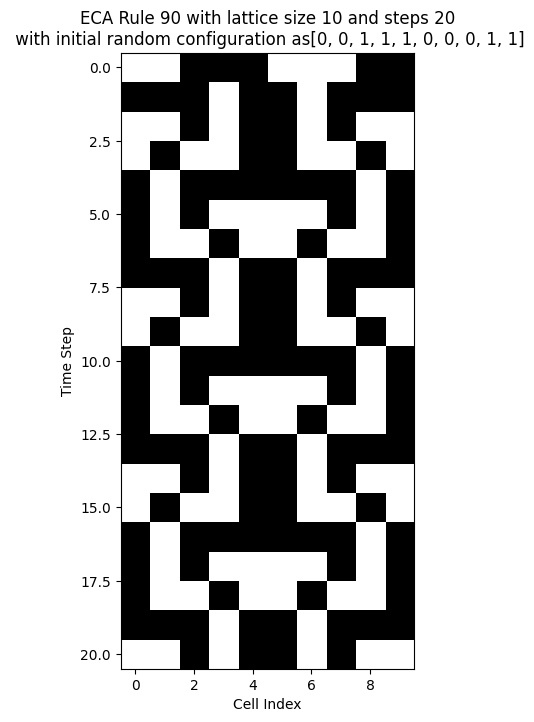

In [168]:
plot_space_time(space_time)



# Ploting the Transition Diagram with n = 4

In [169]:
space_time_all = []
i = 0
for i in range(16):
    space_time_all.append(eca(rule, 4, 100,False,int_to_bin_list(i, 4)))
    # 4 because 4 cells in the lattice
    # 100 because 100 time steps to see the pattern clearly

In [170]:
space_time_all_values = []
space_time_list = []
for outer_lst in space_time_all:
    for lst in outer_lst:
        space_time_list.append(bin_to_int(lst))
        
    space_time_all_values.append(space_time_list)
    space_time_list = []    
        

In [171]:
def draw_transition_diagram(mylst):
    G = nx.DiGraph()

    labels = {}
    
    for lst in mylst:
        for i in range(len(lst) - 1):
            if lst[i] not in G:
                G.add_node(lst[i])
                labels[lst[i]] = str(lst[i])
            
            if lst[i + 1] not in G:
                G.add_node(lst[i + 1])
                labels[lst[i + 1]] = str(lst[i + 1])
            
            # if there already doesn't exist an edge between the two nodes
            if not G.has_edge(lst[i], lst[i + 1]):
                G.add_edge(lst[i], lst[i + 1])
                
        
    plt.figure(figsize=(20, 20))
    nx.draw(G, labels=labels, with_labels=True, node_size=1500, node_color='lightblue', font_size=12, font_weight='bold', arrowsize=20)
    plt.title('Rule ' + str(rule), size=40, fontweight='bold')
    
    plt.show()

* Here the decimal numbers are the decimal equivalent of the states in binary
* like the state 0010 is represented as 2 here 

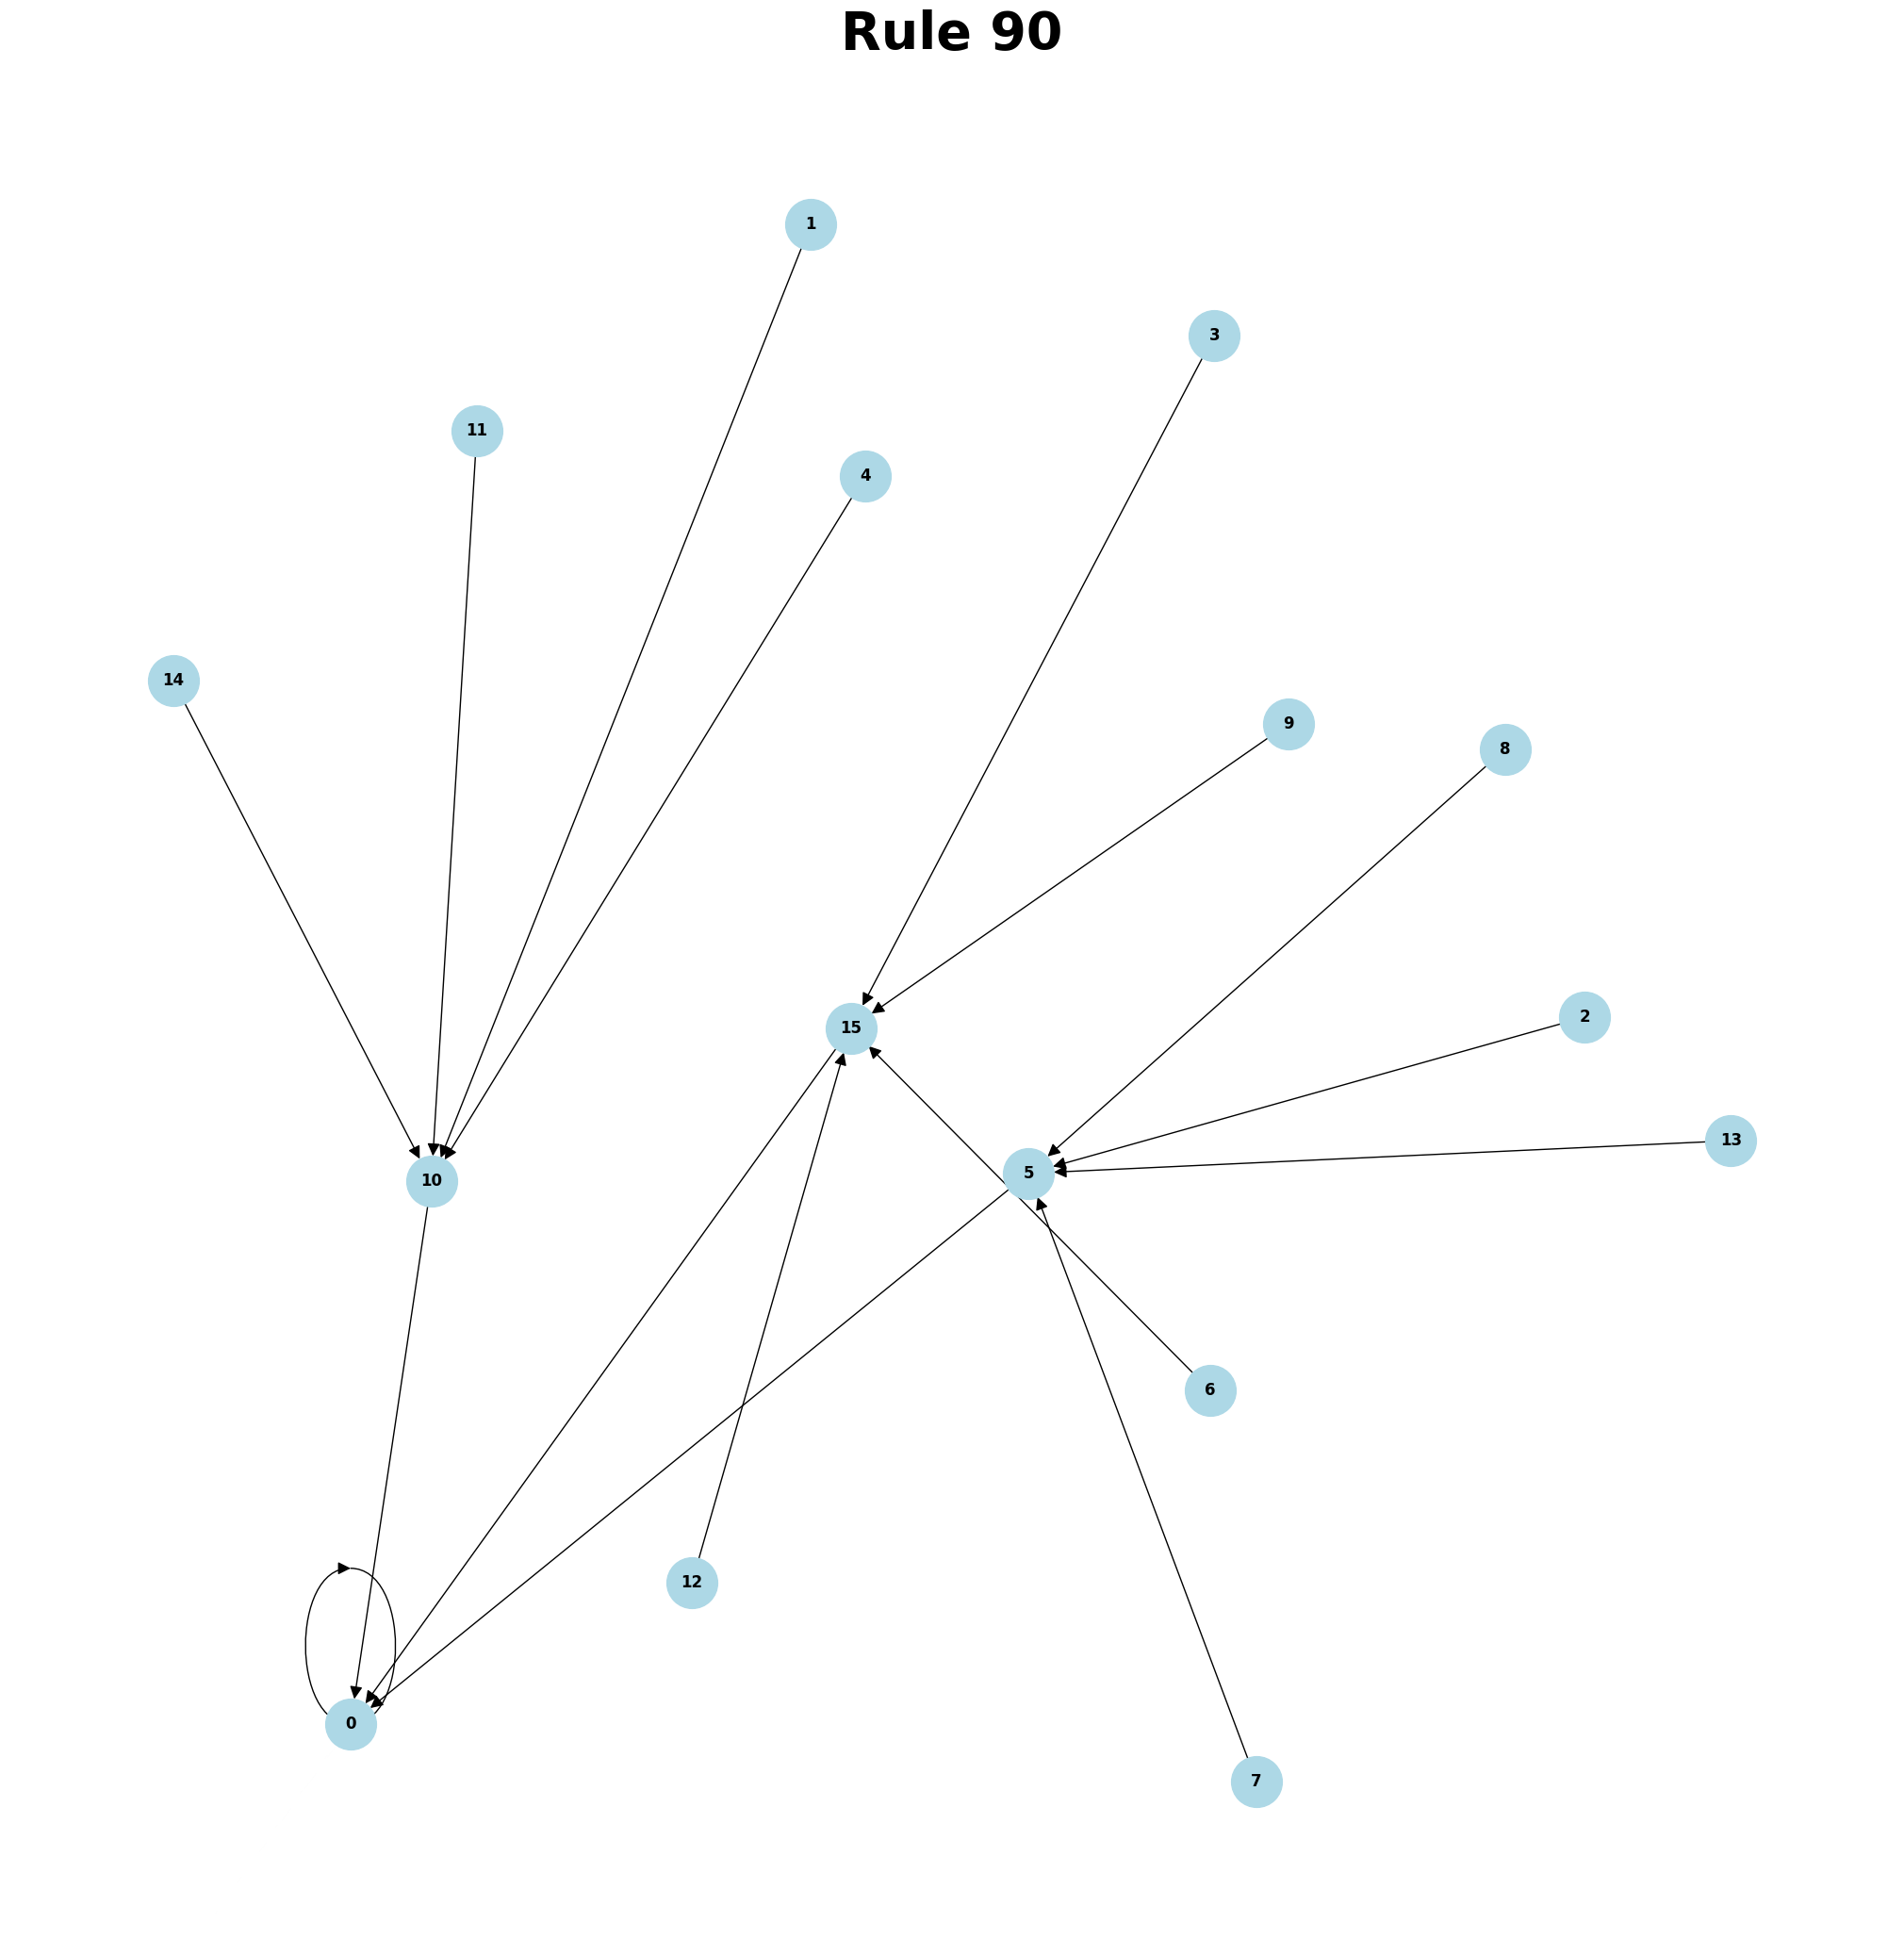

In [173]:

draw_transition_diagram(space_time_all_values)
